# Individual Planning Report
GitHub repository link: https://github.com/MrSaltyPotatoes/UBC-DSCI-100-Project

## Import Data <a id='import'></a>

In [1]:
library(tidyverse)
url_players <- "https://drive.google.com/uc?export=download&id=1UVsY6J_v6s_gCkQRWUPVRkiD4aBypnRj"
players <- read_csv(url_players)
url_sessions <- "https://drive.google.com/uc?export=download&id=1i4i4CRxh8ouTNllQvUkaKF8iRxQgUqbM"
sessions <- read_csv(url_sessions)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimite

## Data Description

In [2]:
players_dimention <- dim(players)
sessions_dimention <- dim(sessions)
players_summary <- players |>
                    summarize(max_played_hours = max(played_hours), 
                              min_played_hours = min(played_hours), 
                              max_age = max(Age, na.rm = TRUE), 
                              min_age = min(Age, na.rm = TRUE))
experience_category <- unique(players$experience)
gender_category <- unique(players$gender)
players_dimention
sessions_dimention
players_summary
experience_category
gender_category

[1] 196   7

[1] 1535    5

max_played_hours,min_played_hours,max_age,min_age
<dbl>,<dbl>,<dbl>,<dbl>
223.1,0,58,9


[1] "Pro"      "Veteran"  "Amateur"  "Regular"  "Beginner"

[1] "Male"              "Female"            "Non-binary"       
[4] "Prefer not to say" "Agender"           "Two-Spirited"     
[7] "Other"

The dataset **players.csv** contains 196 observations and 7 variables.  
The variables are:
+ `experience`: a *character* variable representing the level of gaming experience of a player. It contains 5 categories: `Pro`, `Veteran`, `Amateur`, `Regular`, `Beginner`.
+ `subscribe`: a *logical* variable representing whether the player subscribes to a game-related newsletter. It contains 2 values: `TRUE` (subscribed), `FALSE` (not subscribed).
+ `hashedEmail`: a *character* variable representing a coded version of each player's email address.
+ `played_hours`: a *double* variable representing the number of hours each player spends in playing the game. It ranges from a minimum of 0.00 hours to a maximum of 223.10 hours.
+ `name`: a *character* variable representing the name of each player.
+ `gender`: a *character* variable representing the gender of each player. It contains 7 categories: `Male`,`Female`,`Non-binary`,`Prefer not to say`,`Agender`,`Two-Spirited`,`Other`.
+ `Age`: a *double* variable representing the age of each player. It ranges from a minimum of 9.00 years old to a maximum of 58.00 years old.

**Potential Issue**:
+ The variables `hashedEmail` and `name` do not provide useful information for analysis.
+ If we want to use the variable `experience` as a predictor, we have to process it first, since it is a *character* variable.
+ In `gender` variable, the counts of `Agender`, `Other` and `Two-Spirited` are relatively small compared to the ones of other categories, which may affect the results of analysis.

## Questions

**Broad Question**:
**Question 1**: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?  
**Specific Question**: Can variables `experience`, `played_hours` and `Age` predict whether a player has subscribed to a game-related newsletter or not in the dataset `players.csv`?  

The dataset `players.csv` contains the explanatory variables (`experience`,`played_hours`,`Age`) and the response variable (`subscribe`) that help to answer the question of interest. In order to prepare for data analysis, I will first convert the variable `experience` into numerical variable, so it can be used to predict the response variable using KNN classification. In addition, I will select `experience` column, `played_hours` column, `Age` column and `subscribe` column from the dataset, then scale and center the quantitative variables to prevent variables from dominating the distance calculations.

## Exploratory Data Analysis and Visualization

**Import Dataset:**

The dataset is imported at "Import Data" Section, which is at the beginning of the file.

**Wrangling Data:**

In [3]:
players_tidy <- players |>
                select(experience, played_hours,subscribe,Age)
players_tidy

experience,played_hours,subscribe,Age
<chr>,<dbl>,<lgl>,<dbl>
Pro,30.3,TRUE,9
Veteran,3.8,TRUE,17
Veteran,0.0,FALSE,17
Amateur,0.7,TRUE,21
Regular,0.1,TRUE,21
Amateur,0.0,TRUE,17
Regular,0.0,TRUE,19
Amateur,0.0,FALSE,21
Amateur,0.1,TRUE,47


In [4]:
players_mean <- players |>
                summarize(mean_played_hours = mean(played_hours),
                          mean_age = mean(Age, na.rm = TRUE))
players_mean

mean_played_hours,mean_age
<dbl>,<dbl>
5.845918,21.13918


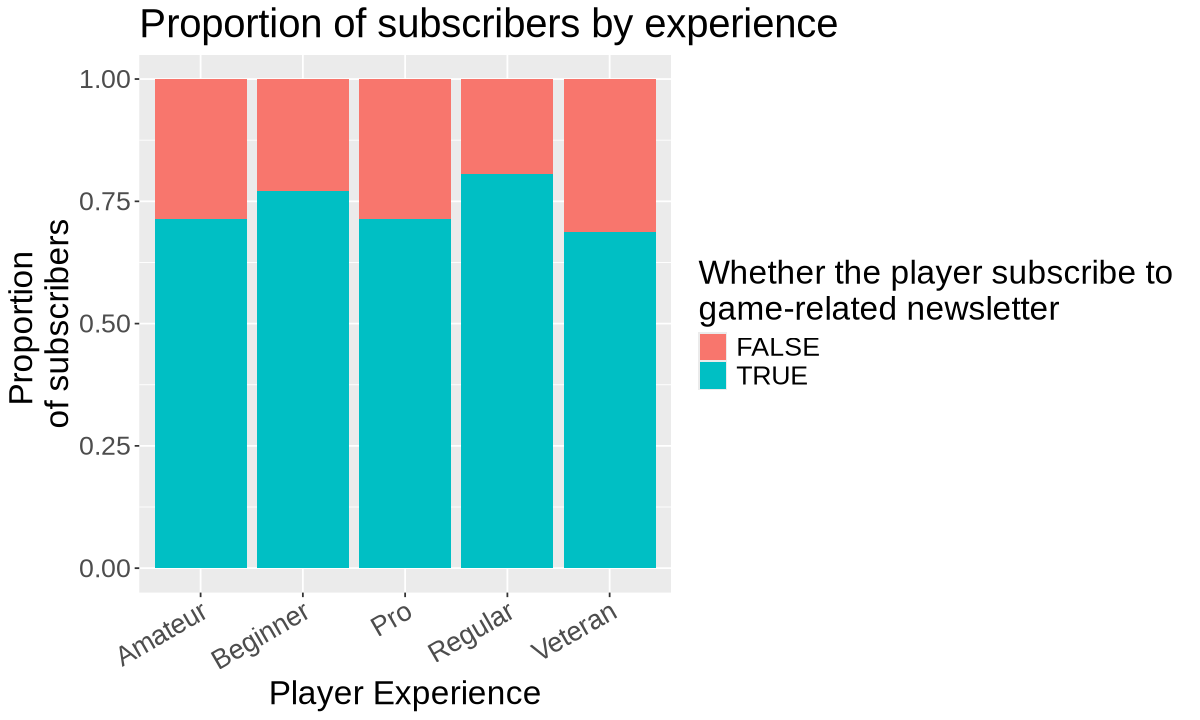

In [5]:
options(repr.plot.width = 10, repr.plot.height = 6)
exp_sub_image <- players |>
                ggplot(aes(x = experience, fill = subscribe)) +
                geom_bar(position = "fill") +
                xlab("Player Experience") +
                ylab("Proportion \nof subscribers") +
                labs(fill = "Whether the player subscribe to \ngame-related newsletter") +
                theme(text = element_text(size = 20)) +
                theme(axis.text.x = element_text(angle = 30, hjust = 1)) +
                ggtitle("Proportion of subscribers by experience")                 
exp_sub_image             

According to the plot, among players with different experience levels, the proportion of players who subscribe to game-related newsletter is higher than the proportion of players who do not subscribe. Overall, the proportions of subscribers and non-subscribers remain similar among all experience levels, which indicates that experience may not be a major variable that helps to predict subscription.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


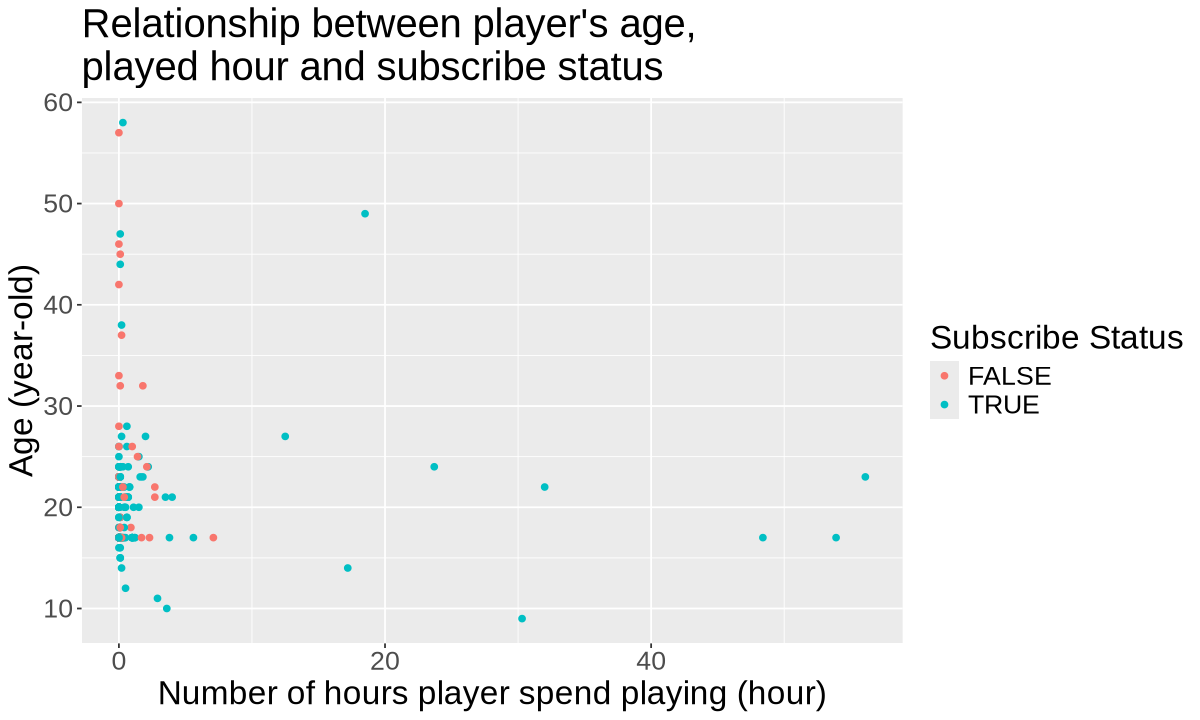

In [6]:
age_played_hours <- players |>
                    filter(played_hours <= 100) |>
                    ggplot(aes(x = played_hours, y = Age, color = subscribe)) +
                    geom_point() +
                    xlab("Number of hours player spend playing (hour)") +
                    ylab("Age (year-old)") +
                    labs(color = "Subscribe Status") +
                    ggtitle("Relationship between player's age, \nplayed hour and subscribe status") +
                    theme(text = element_text(size = 20))
age_played_hours

From the plot, it is evident that among all age groups, there are players who subscribe and players who do not subscribe, which indicates that age is not a major variable that helps to predict the subscription status. In contrast, players with a greater amount of time spent playing games are more likely to subscribe, which indicates that played hours is a major variable that helps to predict subscription.

## Methods and Plan

In order to address my question of interest, I will use **KNN Classification** to predict the subscription status. KNN Classification is suitable because it uses one or more quantitative variables to predict a categorical variable. Since the response variable, `subscribe`, is categorical, KNN classification can be used to solve the problem.  
In order to apply KNN classification, I will convert `experience` into a numerical variable as KNN classification only makes predictions based on quantitative variables. One way to process `experience` is to turn categories in `experience` column into numbers. For example, we can assign 5 to "Pro", 4 to "Veteran", 3 to "Amateur", 2 to "Regular" and 1 to "Beginner".  
However, this method may have a limitation. Assigning numbers to categories in `experience` assumes the difference between each experience level is the same (e.g. the gap between "Pro" and "Veteran" is the same as the gap between "Amateur" and "Regular"), which may not be true and can potentially affect the analysis.  
I will first split the dataset into 75% for training and 25% for testing. Then, I will use **cross-validation** and **tune the classifier**, comparing the accuracy of the classifier for different K values and finding the value of K that provides best accuracy. After that, I will apply the best K value to the classifier and check the classifier's accuracy on the test set.